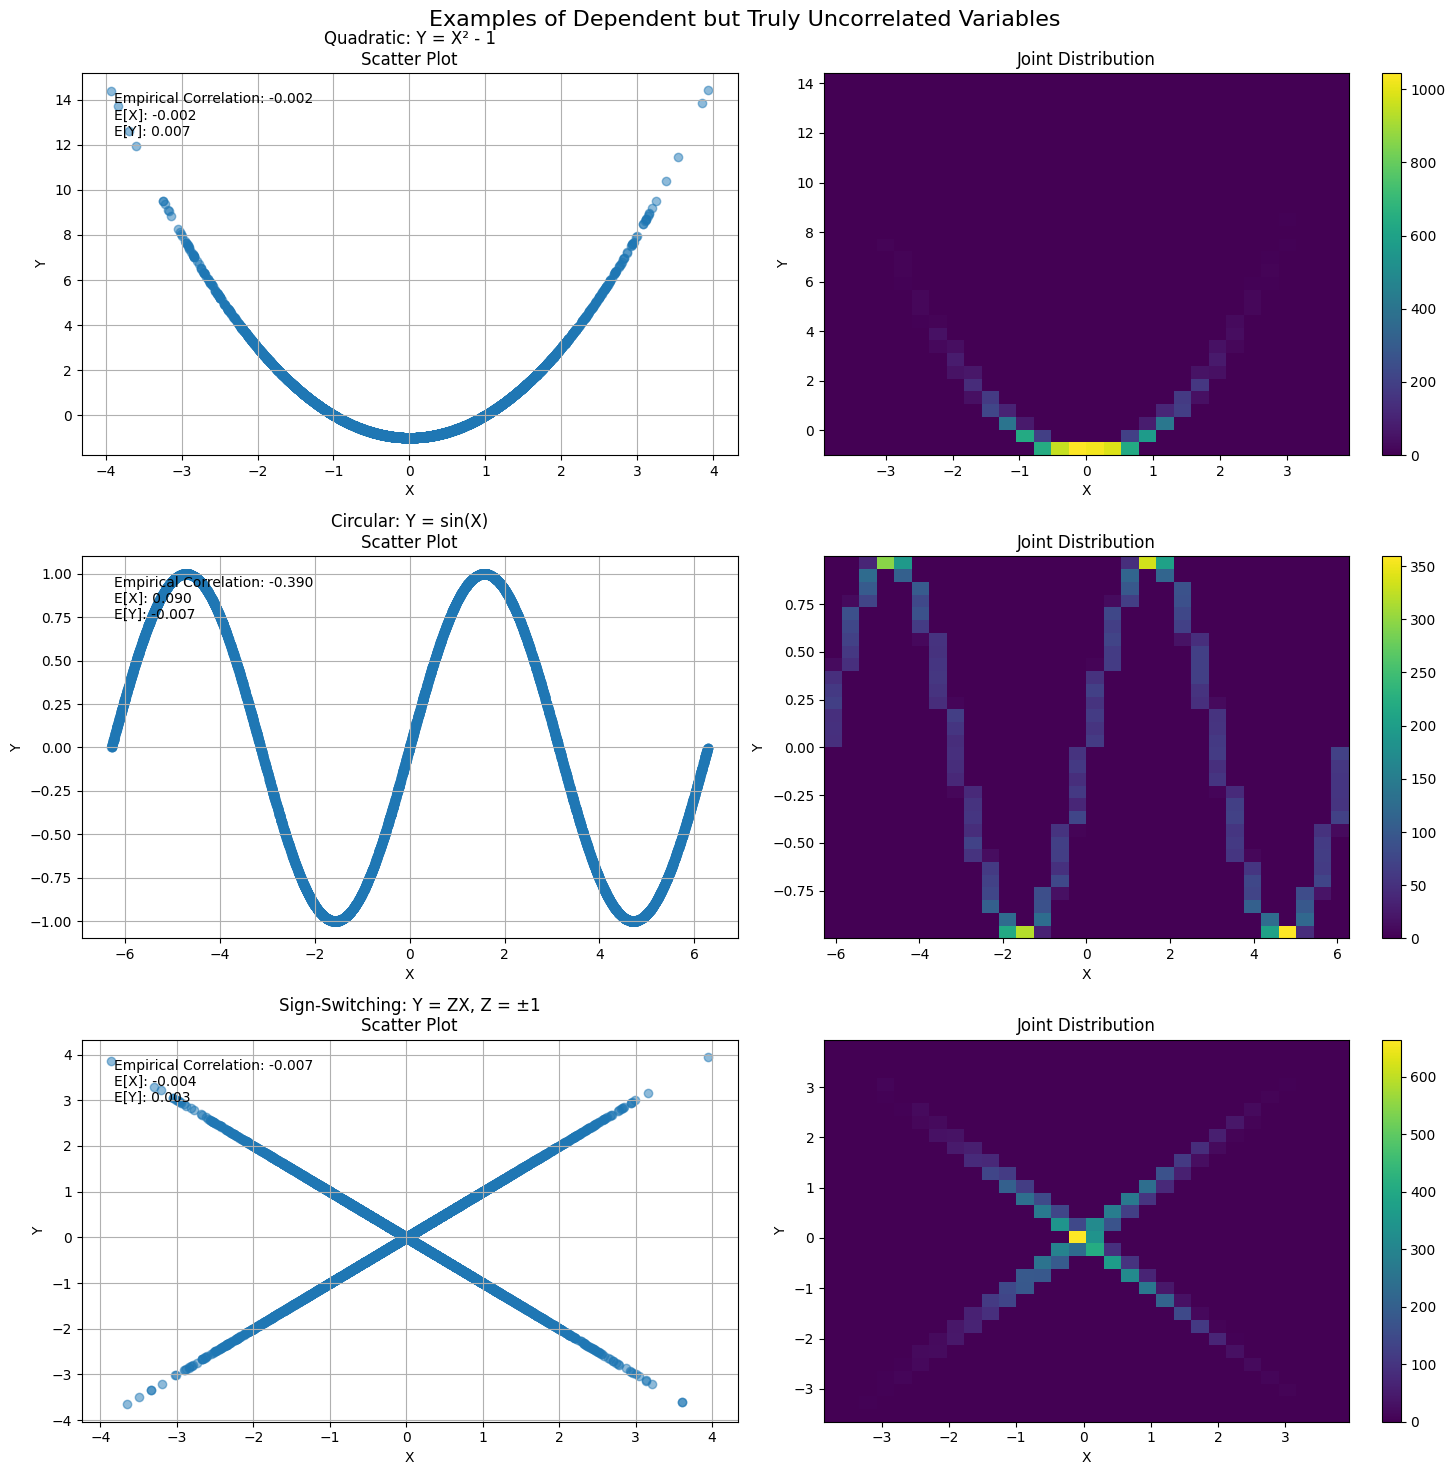


Quadratic Relationship:
Correlation: -0.001611
E[X]: -0.002136
E[Y]: 0.006841
E[XY]: -0.002332
Var(X): 1.006836
Var(Y): 2.054282

Circular Relationship:
Correlation: -0.389509
E[X]: 0.089656
E[Y]: -0.006840
E[XY]: -0.998424
Var(X): 13.233994
Var(Y): 0.495872

Sign-Switching Relationship:
Correlation: -0.006900
E[X]: -0.004226
E[Y]: 0.002769
E[XY]: -0.006788
Var(X): 0.982001
Var(Y): 0.982012


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def create_quadratic_example(n_samples=1000):
    """
    Creates X and Y where Y = X² - E[X²] to ensure zero correlation
    """
    X = np.random.standard_normal(n_samples)
    # For standard normal, E[X²] = 1
    Y = X**2 - 1
    return X, Y

def create_circular_example(n_samples=1000):
    """
    Creates X and Y with sine relationship centered around 0
    """
    X = np.random.uniform(-2*np.pi, 2*np.pi, n_samples)
    Y = np.sin(X)
    return X, Y

def create_sign_switching_example(n_samples=1000):
    """
    Creates X and Y where Y = ZX and Z is random ±1
    """
    X = np.random.standard_normal(n_samples)
    Z = np.random.choice([-1, 1], size=n_samples, p=[0.5, 0.5])
    Y = Z * X
    return X, Y

def plot_example(X, Y, title, ax1, ax2):
    """
    Creates a scatter plot and joint distribution plot for X and Y
    Also computes and displays theoretical vs actual correlation
    """
    # Scatter plot
    ax1.scatter(X, Y, alpha=0.5)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True)
    correlation = np.corrcoef(X, Y)[0,1]
    ax1.text(0.05, 0.95, 
             f'Empirical Correlation: {correlation:.3f}\n' +
             f'E[X]: {np.mean(X):.3f}\nE[Y]: {np.mean(Y):.3f}', 
             transform=ax1.transAxes, verticalalignment='top')
    ax1.set_title(f'{title}\nScatter Plot')
    
    # Joint distribution
    h = ax2.hist2d(X, Y, bins=30, cmap='viridis')
    plt.colorbar(h[3], ax=ax2)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Joint Distribution')

# Create figure with subplots
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Examples of Dependent but Truly Uncorrelated Variables', fontsize=16)

# 1. Quadratic Relationship
X1, Y1 = create_quadratic_example(10000)  # Using more samples for better approximation
ax1 = plt.subplot(3, 2, 1)
ax2 = plt.subplot(3, 2, 2)
plot_example(X1, Y1, "Quadratic: Y = X² - 1", ax1, ax2)

# 2. Circular Relationship
X2, Y2 = create_circular_example(10000)
ax3 = plt.subplot(3, 2, 3)
ax4 = plt.subplot(3, 2, 4)
plot_example(X2, Y2, "Circular: Y = sin(X)", ax3, ax4)

# 3. Sign-Switching Relationship
X3, Y3 = create_sign_switching_example(10000)
ax5 = plt.subplot(3, 2, 5)
ax6 = plt.subplot(3, 2, 6)
plot_example(X3, Y3, "Sign-Switching: Y = ZX, Z = ±1", ax5, ax6)

plt.tight_layout()
plt.show()

# Verify theoretical properties
def print_theoretical_properties(X, Y, name):
    print(f"\n{name} Relationship:")
    print(f"Correlation: {np.corrcoef(X, Y)[0,1]:.6f}")
    print(f"E[X]: {np.mean(X):.6f}")
    print(f"E[Y]: {np.mean(Y):.6f}")
    print(f"E[XY]: {np.mean(X*Y):.6f}")
    print(f"Var(X): {np.var(X):.6f}")
    print(f"Var(Y): {np.var(Y):.6f}")

for X, Y, name in [(X1, Y1, "Quadratic"), 
                   (X2, Y2, "Circular"),
                   (X3, Y3, "Sign-Switching")]:
    print_theoretical_properties(X, Y, name)

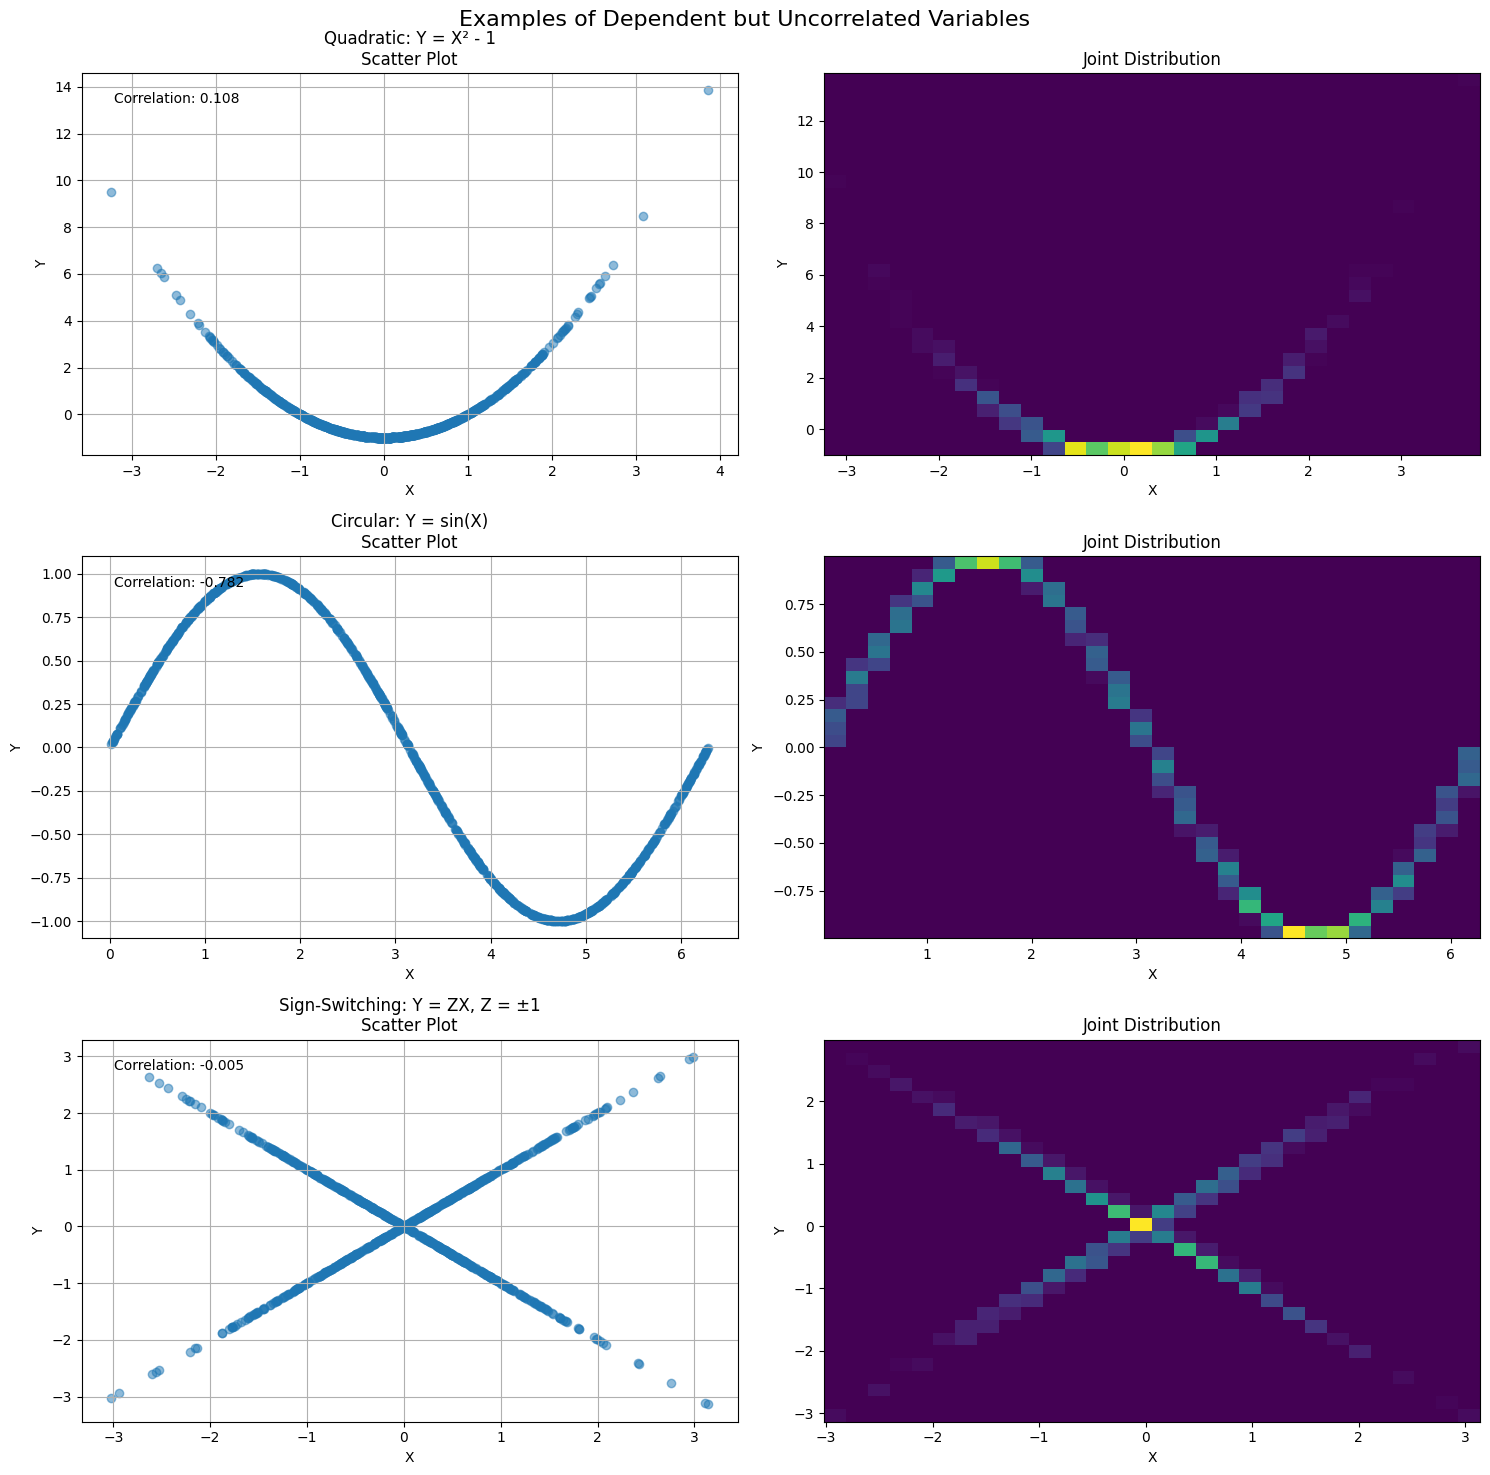


Quadratic Relationship:
Correlation: 0.108
Mean X: 0.019, Mean Y: -0.042
Var X: 0.958, Var Y: 1.906
Mutual Information: 0.973

Circular Relationship:
Correlation: -0.782
Mean X: 3.165, Mean Y: -0.028
Var X: 3.279, Var Y: 0.496
Mutual Information: 2.049

Sign-Switching Relationship:
Correlation: -0.005
Mean X: 0.015, Mean Y: 0.023
Var X: 0.938, Var Y: 0.938
Mutual Information: 1.550


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def create_quadratic_example(n_samples=1000):
    """
    Creates X and Y where Y = X^2 - 1
    This ensures E[Y] = 0 when X is standard normal
    """
    X = np.random.standard_normal(n_samples)
    Y = X**2 - 1
    return X, Y

def create_circular_example(n_samples=1000):
    """
    Creates X and Y where Y = sin(X)
    """
    X = np.random.uniform(0, 2*np.pi, n_samples)
    Y = np.sin(X)
    return X, Y

def create_sign_switching_example(n_samples=1000):
    """
    Creates X and Y where Y = ZX and Z is random ±1
    """
    X = np.random.standard_normal(n_samples)
    Z = np.random.choice([-1, 1], size=n_samples, p=[0.5, 0.5])
    Y = Z * X
    return X, Y

def plot_example(X, Y, title, ax1, ax2):
    """
    Creates a scatter plot and joint distribution plot for X and Y
    """
    # Scatter plot
    ax1.scatter(X, Y, alpha=0.5)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True)
    correlation = np.corrcoef(X, Y)[0,1]
    ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=ax1.transAxes, verticalalignment='top')
    ax1.set_title(f'{title}\nScatter Plot')
    
    # Joint distribution
    ax2.hist2d(X, Y, bins=30, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Joint Distribution')

def compute_mutual_information(X, Y, bins=20):
    """
    Compute mutual information between X and Y using binning
    """
    # Normalize the data to [0,1] range for consistent binning
    X_norm = (X - X.min()) / (X.max() - X.min())
    Y_norm = (Y - Y.min()) / (Y.max() - Y.min())
    
    # Compute joint histogram
    hist_2d, _, _ = np.histogram2d(X_norm, Y_norm, bins=bins)
    
    # Add small constant to avoid log(0)
    hist_2d = hist_2d + 1e-10
    
    # Compute marginal histograms
    hist_x = np.sum(hist_2d, axis=1)
    hist_y = np.sum(hist_2d, axis=0)
    
    # Compute probabilities
    p_xy = hist_2d / np.sum(hist_2d)
    p_x = hist_x / np.sum(hist_x)
    p_y = hist_y / np.sum(hist_y)
    
    # Compute mutual information
    MI = 0
    for i in range(bins):
        for j in range(bins):
            MI += p_xy[i,j] * np.log(p_xy[i,j] / (p_x[i] * p_y[j]))
    
    return MI

# Create figure with subplots
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Examples of Dependent but Uncorrelated Variables', fontsize=16)

# 1. Quadratic Relationship
X1, Y1 = create_quadratic_example()
ax1 = plt.subplot(3, 2, 1)
ax2 = plt.subplot(3, 2, 2)
plot_example(X1, Y1, "Quadratic: Y = X² - 1", ax1, ax2)

# 2. Circular Relationship
X2, Y2 = create_circular_example()
ax3 = plt.subplot(3, 2, 3)
ax4 = plt.subplot(3, 2, 4)
plot_example(X2, Y2, "Circular: Y = sin(X)", ax3, ax4)

# 3. Sign-Switching Relationship
X3, Y3 = create_sign_switching_example()
ax5 = plt.subplot(3, 2, 5)
ax6 = plt.subplot(3, 2, 6)
plot_example(X3, Y3, "Sign-Switching: Y = ZX, Z = ±1", ax5, ax6)

plt.tight_layout()
plt.show()

# Print numerical summaries and mutual information
for i, (X, Y, name) in enumerate([(X1, Y1, "Quadratic"), 
                                 (X2, Y2, "Circular"),
                                 (X3, Y3, "Sign-Switching")]):
    print(f"\n{name} Relationship:")
    print(f"Correlation: {np.corrcoef(X, Y)[0,1]:.3f}")
    print(f"Mean X: {np.mean(X):.3f}, Mean Y: {np.mean(Y):.3f}")
    print(f"Var X: {np.var(X):.3f}, Var Y: {np.var(Y):.3f}")
    print(f"Mutual Information: {compute_mutual_information(X, Y):.3f}")